In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

## Exercise 1

The datasets `exercise1_x.csv` and `exercise1_y.csv` were generated using a linear model of the form $y=\sum_{n=0}^{N}a_{n}x^{n}+\epsilon$. First, state a capacity parameter for this type of model and then find an appropriate value for this dataset. You may find `sklearn.linear_model.LinearRegression` and `sklearn.preprocessing.PolynomialFeatures` useful for this.

$N$ is an example of a capacity parameter.

In [82]:
x = np.load('exercise1_x.npy')
y = np.load('exercise1_y.npy')

In [3]:
# This code was used to generate x and y
np.random.seed(10)

size = 100
x = (np.random.rand(size, 1)) * 50 + 15
ϵ = np.random.normal(scale=15, size=(size, 1))
y = 50 + 0.05 * x - 0.01 * x ** 2 + 0.002 * x ** 3  + ϵ

In [4]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X = poly_features.fit_transform(x)
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
x_new = (np.random.rand(100, 1)) * 75 
X_new = poly_features.fit_transform(x_new)

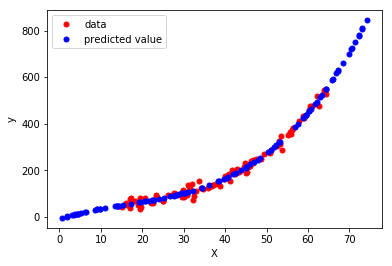

In [12]:
plt.plot(x, y, 'ro', markersize=5, label='data')
plt.plot(x_new.flatten(), lr.predict(X_new), 'bo', markersize=5, label='predicted value')
plt.xlabel('X')
plt.ylabel('y')
plt.legend();

## Exercise 2

Consider the following model:

$$
y = 50 + 0.05x - 0.01x^{2} + 0.002x^{3} + \epsilon  
$$
$$
\epsilon\sim N\left(0,15\right)    
$$
$$
X\sim U\left(15,65\right)  
$$

For sample sizes between 20 and 100, first draw a training and test set and then compute the test error for polynomials of degree 3, 5, 7, and 9. Then, repeat this experiment 200 times to obtain an average test error for each sample size and polynomial degree pair. You may use `sklearn.metrics.mean_squared_error`. Plot the average test error.

**What can you learn from this experiment?**

You may use `np.random.seed(3)` if you want to replicate the proposed solution.

In [38]:
np.random.seed(3)

nb_samples = np.arange(20, 100, 5)
nb_experiments = 300
poly_degrees = np.array([3, 5, 7, 9])
mse = np.zeros((nb_samples.size, poly_degrees.size))

poly_features = PolynomialFeatures(degree=poly_degrees.max(), include_bias=False)

for _ in range(nb_experiments):
    for i, nb_sample in enumerate(nb_samples):
        X_train = (np.random.rand(nb_sample, 1)) * 50 + 15
        ϵ_train = np.random.normal(scale=15, size=(nb_sample, 1))
        y_train = 50 + 0.05 * X_train - 0.01 * X_train ** 2 + 0.002 * X_train ** 3  + ϵ_train

        X_train = poly_features.fit_transform(X_train)
        
        size_test = 200
        X_test = (np.random.rand(size_test, 1)) * 50 + 15
        ϵ_test = np.random.normal(scale=15, size=(size_test, 1))
        y_test = 50 + 0.05 * X_test - 0.01 * X_test ** 2 + 0.002 * X_test ** 3  + ϵ_test

        X_test =  poly_features.fit_transform(X_test)

        for j, poly_degree in enumerate(poly_degrees):        
            lr = LinearRegression()
            lr.fit(X_train[:, :poly_degree], y_train[:, :poly_degree])
            mse[i, j] += mean_squared_error(y_test, lr.predict(X_test[:, :poly_degree]))
            
mse /= nb_experiments

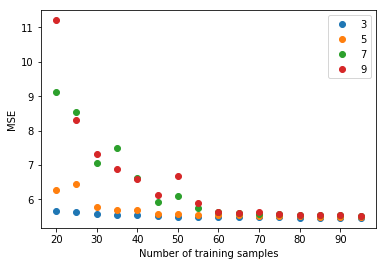

In [39]:
for i in range(poly_degrees.size):
    plt.plot(nb_samples, np.log(mse[:, i]), 'o', label=poly_degrees[i])
    
plt.plot()
plt.ylabel('MSE')
plt.xlabel('Number of training samples')
plt.legend();

## Exercise 3

Consider the following model:

$$
y = 0.5 + 0.7x_{1} + 1.5x_{2} - 0.4x_{3} + \epsilon
$$
$$
\epsilon\sim N\left(0,1\right)    
$$

For $i=1,\dots,6$, draw $x_{i}\sim N\left(0,1\right)$ and compute $y$.

Estimate the following model using `sklearn.linear_model.Lasso` and `sklearn.linear_model.Ridge`:

$$
y=\beta_{0}+\sum_{i=1}^{6}\beta_{i}x_{i}
$$ 

Plot the estimated weights for different level of regularization $\lambda$.

Hint: Use $\lambda_{LASSO}\in\left[0,1\right]$ and $\lambda_{RIDGE}\in\left[0,10000\right]$.

**What can you learn from this experiment?**

You may use `np.random.seed(10)` if you want to replicate the proposed solution.

In [25]:
np.random.seed(10)

nb_features = 6
nb_samples = 300

β = np.array([0.7, 1.5, -0.4])
X = np.random.normal(size=(nb_samples, nb_features))

y = 0.5 + X[:, :β.size] @ β + np.random.normal(size=nb_samples)

λs_lasso = np.arange(0.05, 1, 0.05)
weights_lasso = np.zeros((λs_lasso.size, nb_features+1))

λs_ridge = np.arange(1, 10000, 10)
weights_ridge = np.zeros((λs_ridge.size, nb_features+1))

In [32]:
def experiment(model, λs, weights):
    # Compute weights for different regularization parameters
    for i, λ in enumerate(λs):
        model_instance = model(alpha=λ)
        model_instance.fit(X, y)
        weights[i, 0] = model_instance.intercept_
        weights[i, 1:] = model_instance.coef_

    # Plot
    for feature in range(nb_features+1):
        plt.plot(λs, weights[:, feature], label=feature)
        
    plt.xlabel('Regularization parameter')
    plt.ylabel('Weight value')
    plt.legend()

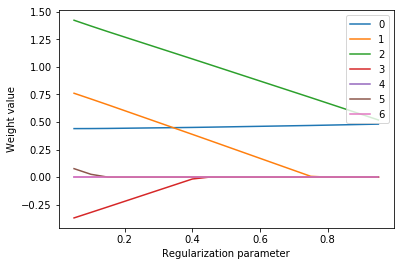

In [33]:
experiment(Lasso, λs_lasso, weights_lasso)

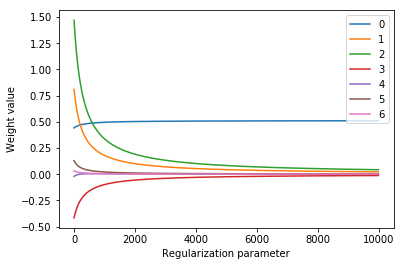

In [34]:
experiment(Ridge, λs_ridge, weights_ridge)